<a href="https://colab.research.google.com/github/okcza515/CPE342_Lab_QAgent_reinforcement-learning/blob/main/Lab14_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab14 Introduction to Reinforcement Learning

- ณัชพงศ์ ประมวลทรัพย์ 640501092

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

###The total lab score is 10 which will be evaluated as follows:

- Creative  (Do as the instruction said. This include the model tuning section where you have to do a proper amount of tuning) - 4 points
- Design of logic (No weired things in the process) - 2 points
- Journaling (Communicate your thought process and discuss result & analyse in every step) - 4 points

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='https://github.com/fongfongfong/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/rl.png?raw=1' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br>
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [ ]:
# Setup
import sys
sys.path.append("/content/drive/MyDrive/Lab14-Reinforcement-Learning/Lab14-Reinforcement-Learning/")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env

### Environment - Cliff Gridworld

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='https://github.com/fongfongfong/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/grid.png?raw=1' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point.
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [ ]:
# Initialize environment
env = env.World()

In [ ]:
env.grid

array([[ -1.,  -1.,  -1.,  -1., -20., -20., -20., -20., -20.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20., -20., -20., -20., -20.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1., -10., -10.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1., -20.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1.,  -1.,  20.]])

In [ ]:
env.render()

array([[  0.,   0.,   0.,   0., -20., -20., -20., -20., -20.,   0.],
       [  0.,   0.,   1.,   0., -20., -20., -20., -20., -20.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0., -10., -10.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0., -20.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0.,   0.,  10.]])

In [ ]:
env.current_location

(1, 2)

In [ ]:
env.available_actions()

['up', 'down', 'left', 'right']

### Define Random Agent

Define an agent that walk randomly.

Hint : use
` np.random.choice` to random available action

In [ ]:
class DumbAgent():
    def action(self, available_actions):
        return np.random.choice(available_actions)

In [ ]:
# Test your code
agent = DumbAgent()
agent.action([1,2,3,4])

4



```
# มีการจัดรูปแบบเป็นโค้ด
```

###  Define a Q-Agent

Define an agent that used q-learning using the following pseudocode: </br>
<img src='https://github.com/fongfongfong/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/q_learning.png?raw=1'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [ ]:
class Q_Agent():

    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}

        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon


    def action(self, available_actions):
        if np.random.uniform(0,1) < self.epsilon:
            # Exploration
            return np.random.choice(available_actions)
        else:
            # Exploitation
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values())
            # random if you have multiple max value
            return np.random.choice([key for key, value in S.items() if value == max_value])


    def update(self, current_state, reward, next_state, actions):
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_Q_value = self.q_table[current_state][actions]

        # From the equation in pseudocode
        self.q_table[current_state][actions] = current_Q_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_Q_value)

###  Deploy Your Agent

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn:
    agent.update( ... )
```

In [ ]:
def run(env, agent, trials, max_steps_per_episode, learn=False):
    total_reward = []  # Store total rewards for each episode

    for trial in range(trials):
        env.reset()  # Reset the environment for each trial
        sum_reward = 0  # Initialize sum of rewards for the current trial

        for step in range(max_steps_per_episode):
            current_state = env.current_location
            available_actions = env.available_actions()

            action = agent.action(available_actions)

            # Take the action in the environment and observe the next state and reward
            reward = env.move_agent(action)
            next_state = env.current_location

            sum_reward += reward  # Accumulate rewards for this episode

            if learn:
                agent.update(current_state, reward, next_state, action)

            if env.end_state():  # Check if the episode ended
                break

        total_reward.append(sum_reward)  # Store the total reward for this episode

    return total_reward


In [ ]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### Run a Dump Agent

In [ ]:
## Run
env.reset()
agent =  DumbAgent()
total_reward = run(env, agent, trials=100, max_steps_per_episode=200, learn=False)

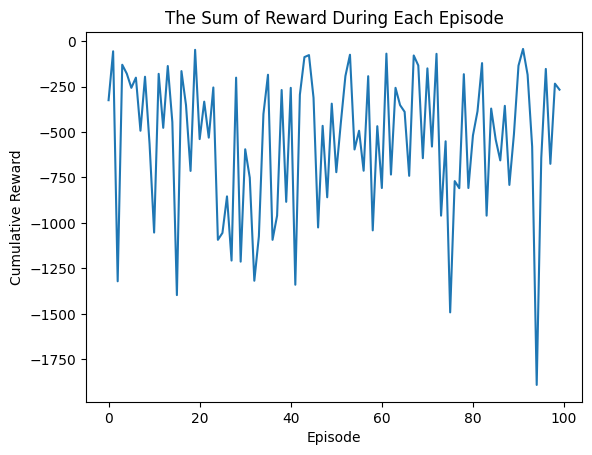

In [ ]:
## Plot reward
plot_total_reward(total_reward )

### Run an Q-Agent

In [ ]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.1, gamma=0.9, epsilon=0.001)
total_reward = run(env, agent, trials=500, max_steps_per_episode=500, learn=True)

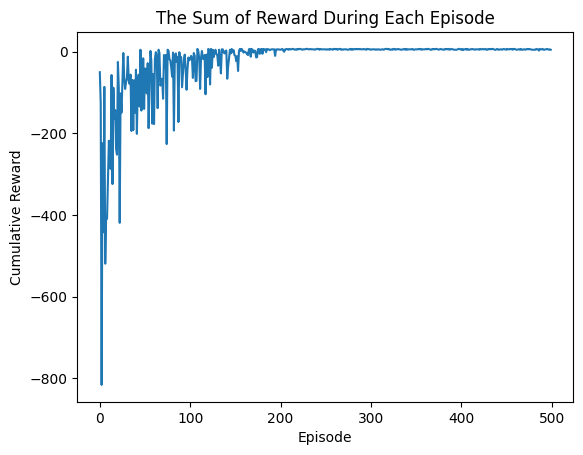

In [ ]:
## Plot reward
plot_total_reward(total_reward )

In [ ]:
max(total_reward)

7.0

### Results and Discussion

Compare the result from a dump agent, as a based line, and the q-agent with different parameters.

จากการเรียนรู้ของ AgentQ ทำให้ cumulative reward มีค่ามากที่สุดคือ 7 นั่นคือการเดินแบบไม่ผิดเลย 13 ครั้ง ทำให้เกิดคะแนน -13 และเดินเข้าเส้นชัย +20 เป็น total reward = 7 คะแนนและจากกราฟจะเห็นว่าในการเดินรอบหลังๆ ของ AgentQ จะมีค่า cummulative reward เกิน 0 ไปเรื่อยๆ ซึ่งแสดงให้เห็นถึงความแม่นยำของการเดินของ AgentQ
แต่การเดินของ DumbAgent นั้นเป็นแค่การเดินสุ่มๆ คะแนนที่ออกมาจึงค่อนข้างแกว่ง

จากการลองเปลี่ยน parameter พบว่า


ยิ่งค่า alpha สูง จะทำให้ค่า updates เปลี่ยนมากขึ้นในแต่ละครั้ง แต่อาจทำให้ไม่เสถียร(แกว่งขึ้นๆลงๆ) ได้ ถ้ามากเกินไป

ยิ่งค่า gamma ต่ำ ทำให้ในการเดินแต่ละครั้ง AgentQ มีแนวโน้มที่เลือกผลลัพธ์ระยะสั้นมากกว่า นั่นคือยิ่งต่ำ มันจะชอบเลือกเส้นทางที่เจ็บน้อยที่สุด ไม่ค่อยกล้าลองเสี่ยงอะไรใหม่ๆ
การเดินที่เกิดขึ้นก็จะใช้เวลาพัฒนานาน อาจต้องใช้หลาย Episode ในการเรียนรู้มากขึ้น

ยิ่ง epsilon สูง ยิ่งมีแนวโน้มทำให้ AgentQ เลือกที่จะลองเดินเส้นทางอื่นมากกว่าเลือกเส้นทางเดิมของตนมากขึ้น กราฟที่เกิดขึ้นจะอาจเสถียรได้ยาก แม้จะผ่านไปหลาย Episode




### Show Q-Table

Show the agent's Q-table using to make a decision.

In [ ]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [ ]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-5.383794140384252
	down
		-5.375337292589501
	left
		-5.386224337341229
	right
		-5.417745552825117
(0, 1)
	up
		-5.415691760495621
	down
		-5.127453863864567
	left
		-5.392478354378753
	right
		-5.410554949250369
(0, 2)
	up
		-5.337365619049147
	down
		-4.690969091887852
	left
		-5.334132850309782
	right
		-5.299074456404919
(0, 3)
	up
		-5.142737842888286
	down
		-5.148460667399971
	left
		-5.169504405948296
	right
		-9.645828360460433
(0, 4)
	up
		-2.0
	down
		-2.0
	left
		-1.764338364488573
	right
		-2.0
(0, 5)
	up
		0
	down
		-2.0
	left
		-2.0
	right
		-2.0
(0, 6)
	up
		0
	down
		-2.0
	left
		-2.0
	right
		0
(0, 7)
	up
		0
	down
		-2.0
	left
		0
	right
		-2.0
(0, 8)
	up
		-2.0
	down
		-2.0
	left
		-2.0
	right
		-0.3313511259544658
(0, 9)
	up
		-2.0565696127494535
	down
		-2.0524567468604578
	left
		-3.809
	right
		-1.9836941046095409
(1, 0)
	up
		-5.378309794301424
	down
		-5.088228105652884
	left
		-5.384211108896303
	right
		-5.372180245203742
(1, 1)
	up
		-5.52876